#### Load data from salary.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('datasets/salary_food.csv')
df

#### Check distribute data

In [ ]:
# plt.plot(df['income'], df['food_expenses'], '.', color='blue')
plt.scatter(df['income'], df['food_expenses'], color='blue')

# find slope
m, b = np.polyfit(df['income'], df['food_expenses'], 1)

# create linear regression
plt.plot(df['income'], m * df['income'] + b, '-', color='red')

plt.show

#### Divide data for Train and Test

In [45]:
# x, y for simple regression
x = df[['income']]
y = df[['food_expenses']]

# split the data into training/testing sets
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)



[[16]
 [20]
 [12]
 [14]
 [14]
 [15]
 [12]
 [10]
 [10]
 [12]]
[[52]
 [60]
 [50]
 [52]
 [50]
 [48]
 [48]
 [46]
 [48]
 [50]]
[[17]
 [18]]
[[54]
 [56]]


#### Teach training model

In [13]:
# create model object linear regression
model = LinearRegression()

# train the model with data
model.fit(x_train, y_train)

LinearRegression()

#### Predicting from Regression model

In [16]:
xr = model.predict(x_test)
print('Predict:', xr)

Predict: [[54.3030303 ]
 [55.41818182]]


#### Model Evaluation

In [21]:
print('Coefficient:', model.coef_)                                      # coefficient value
print('Intercept', model.intercept_)                                    # intercept value

print('R-squared score:', model.score(x_test, y_test))                  # accurate value
print('R-squared score: %.2f%%' % (model.score(x_test, y_test) * 100))  # accurate value

Coefficient: [[1.11515152]]
Intercept [35.34545455]
R-squared score: 0.7848301193755732
R-squared score: 78.48%


#### Draw Graph of result model

<function matplotlib.pyplot.show(close=None, block=None)>

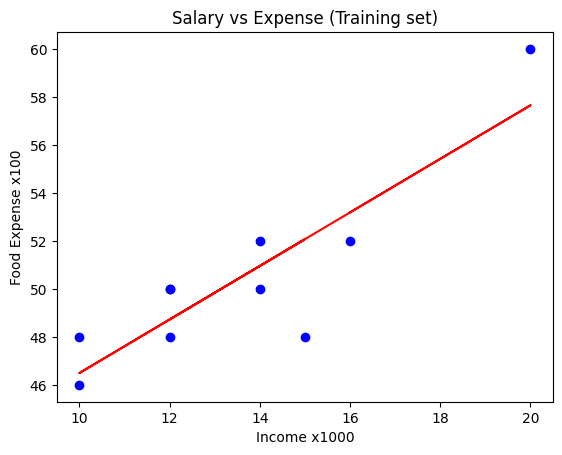

In [29]:
plt.scatter(x_train, y_train, color = 'blue')                   # plotting the training set
plt.plot(x_train, model.predict(x_train), color = 'red')        #plotting the predicted values

# add label
plt.title('Salary vs Expense (Training set)')
plt.xlabel('Income x1000')
plt.ylabel('Food Expense x100')

plt.show

#### Save and Use by model export

In [31]:
!pip show joblib

Name: joblib
Version: 1.3.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: D:\Document\Programer\Python Training\Projects\Python_testing\env\Lib\site-packages
Requires: 
Required-by: scikit-learn


In [35]:
from joblib import dump

dump(model, 'salary_food_model.joblib')

['salary_food_model.joblib']

['salary_food_model.joblib']

#### Load model for using

In [44]:
from joblib import load
myModel = load('../MyModelTrain/salary_food_model.joblib')

myModel.predict([[5], [23], [35]])

array([[40.92121212],
       [60.99393939],
       [74.37575758]])